In [2]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
X = []
Y = []
# 対象Aの画像
for picture in list_pictures('./datasets/Train/class0/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)
    Y.append(0)
# 対象Bの画像
for picture in list_pictures('./datasets/Train/class1/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)    
    Y.append(1)
# arrayに変換
X = np.asarray(X)
Y = np.asarray(Y)

In [22]:
Xtrain = []
Ytrain = []
# 対象Aの画像
for picture in list_pictures('./datasets/Train/class0/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    Xtrain.append(img)
    Ytrain.append(0)
# 対象Bの画像
for picture in list_pictures('./datasets/Train/class1/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    Xtrain.append(img)    
    Ytrain.append(1)
# arrayに変換
Xtrain = np.asarray(Xtrain)
Ytrain = np.asarray(Ytrain)
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/255.0
Ytrain = np_utils.to_categorical(Ytrain, 2)

In [23]:
Xtest = []
Ytest = []
# 対象Aの画像
for picture in list_pictures('./datasets/Test/class0/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    Xtest.append(img)
    Ytest.append(0)
# 対象Bの画像
for picture in list_pictures('./datasets/Test/class1/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    Xtest.append(img)    
    Ytest.append(1)
# arrayに変換
Xtest = np.asarray(Xtest)
Ytest = np.asarray(Ytest)
Xtest = Xtest.astype('float32')
Xtest = Xtest/255.0
Ytest = np_utils.to_categorical(Ytest, 2)

In [24]:
X_train, X_test, y_train, y_test=Xtrain,Xtest,Ytrain,Ytest

In [4]:
X = X.astype('float32')
X = X / 255.0
# クラスの形式を変換
Y = np_utils.to_categorical(Y, 2)
# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)

In [10]:
def scam_model():
    model=Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))       # クラスは2個
    model.add(Activation('softmax'))
    
    return model

In [12]:
def train():
    model=scam_model()
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=5, epochs=1,
                   validation_data = (X_test, y_test), verbose = 1)
    model.pre

In [7]:
def plot_hist(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

In [8]:
def test():
    # テストデータに適用
    predict_classes = model.predict_classes(X_test)
    # マージ。yのデータは元に戻す
    mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(y_test, axis=1)})
    # confusion matrix
    pd.crosstab(mg_df['class'], mg_df['predict'])

In [13]:
train()

Train on 6844 samples, validate on 3371 samples
Epoch 1/10
6844/6844 [==============================] - 73s 11ms/step - loss: 0.2423 - acc: 0.9249 - val_loss: 0.1855 - val_acc: 0.9499
Epoch 2/10
6844/6844 [==============================] - 72s 11ms/step - loss: 0.1809 - acc: 0.9497 - val_loss: 0.2066 - val_acc: 0.9451
Epoch 3/10
6844/6844 [==============================] - 72s 11ms/step - loss: 0.1691 - acc: 0.9546 - val_loss: 0.1791 - val_acc: 0.9508
Epoch 4/10
6844/6844 [==============================] - 72s 11ms/step - loss: 0.1749 - acc: 0.9489 - val_loss: 0.1904 - val_acc: 0.9493
Epoch 5/10
6844/6844 [==============================] - 72s 11ms/step - loss: 0.1655 - acc: 0.9525 - val_loss: 0.1763 - val_acc: 0.9522
Epoch 6/10
6844/6844 [==============================] - 72s 11ms/step - loss: 0.1628 - acc: 0.9524 - val_loss: 0.1766 - val_acc: 0.9522
Epoch 7/10
6844/6844 [==============================] - 72s 11ms/step - loss: 0.1555 - acc: 0.9549 - val_loss: 0.1689 - val_acc: 0.9513


In [19]:
predict_classes = model.predict_classes(X_test)
    # マージ。yのデータは元に戻す
mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(y_test, axis=1)})
# confusion matrix
pd.crosstab(mg_df['class'], mg_df['predict'])

predict,0,1
class,,
0,2818,49
1,407,97


In [34]:
model=scam_model()
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=5, 
                    epochs=10,
#                     validation_data = (X_test, y_test), 
                    validation_split=0.1,
                    verbose = 1)
model.evaluate(X_test,y_test)

Train on 1080 samples, validate on 120 samples
Epoch 1/10
1080/1080 [==============================] - 11s 10ms/step - loss: 0.0046 - acc: 0.9981 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
1080/1080 [==============================] - 11s 10ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/10
1080/1080 [==============================] - 11s 10ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
1080/1080 [==============================] - 11s 10ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
1080/1080 [==============================] - 11s 10ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
1080/1080 [==============================] - 11s 10ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
1080/1080 [==============================] - 11s 10ms/step - loss: 1.1921e-07 - ac

[1.1920928955078125e-07, 1.0]

In [35]:
model.evaluate(X_test,y_test)

552/552 [==============================] - 1s 2ms/step


[1.1920928955078125e-07, 1.0]

In [26]:
model_json_str = model.to_json()
open('scam_model.json', 'w').write(model_json_str)
model.save_weights('scam_weights.h5');

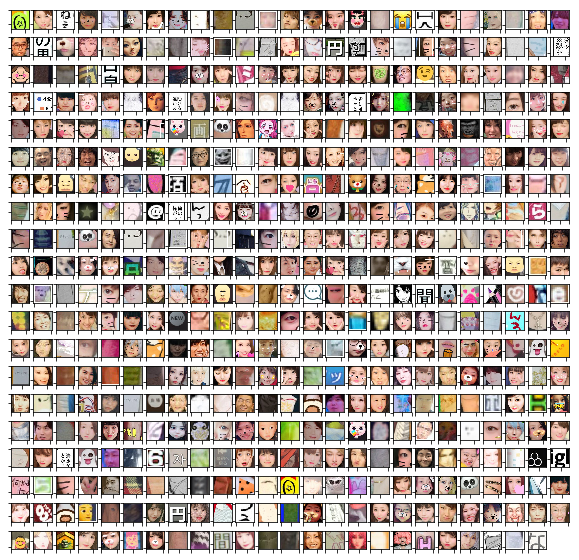

In [36]:
from PIL import Image
import os
%matplotlib inline
res_files=os.listdir('datasets/scam_imgs/')
images=[]
fig = plt.figure(figsize=(10, 10))
for i in range(500):
    images.append(np.array(Image.open('datasets/scam_imgs/'+res_files[i])))
for i in range(1, 500):
    plt.subplot(20, 25, i)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.imshow( images[i - 1] )

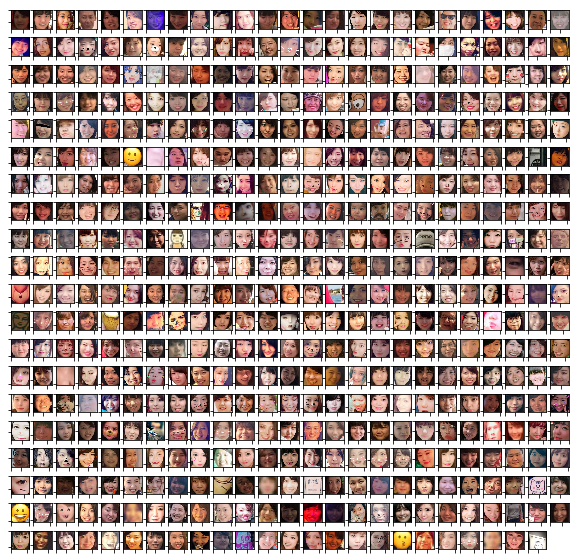

In [38]:
images=[]
res_files=os.listdir('datasets/with_imgs/')
fig = plt.figure(figsize=(10, 10))
for i in range(500):
    images.append(np.array(Image.open('datasets/with_imgs/'+res_files[i])))
for i in range(1, 500):
    plt.subplot(20, 25, i)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.imshow( images[i - 1] )